In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-tank-india/Shark Tank India.csv


In [2]:
shark_tank = pd.read_csv('../input/shark-tank-india/Shark Tank India.csv')
shark_tank

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,35,The Final Destination,117,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1,36,Gateway To Shark Tank India,118,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,...,7.0,4.00,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0
118,1,36,Gateway To Shark Tank India,119,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1,36,Gateway To Shark Tank India,120,Store My Goods,Services,Storage solutions,https://storemygoods.in/,3,2.0,...,0.0,0.00,NaN,25.0,2.0,25.0,NaN,NaN,NaN,2.0


In [3]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            112 non-null    object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    float64
 10  Female Presenters          62 non-null     float64
 11  Couple Presenters          120 non-null    float64
 12  Pitchers Average Age       121 non-null    object 
 13  Started in                 95 non-null     float64

In [4]:
shark_tank.isnull().sum()

Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                9
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters              1
Pitchers Average Age           0
Started in                    26
Pitchers City                  7
Pitchers State                 5
Yearly Revenue                69
Monthly Sales                 56
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer De

## Season 1 - Shark Tank India

In [5]:
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes")

1 season 

36 episodes 

121 startup companies came for pitching 

[3 4] Pitches came per episodes


## Distribution of Cities from which Pitchers came


Mumbai                21
Delhi                 16
Bangalore             10
Pune                   9
Ahmedabad              6
Kolkata                5
Hyderabad              5
Gurgaon                3
Noida                  3
Surat                  2
Gandhinagar            2
Jaipur                 2
Jammu                  2
Nagpur                 2
Mangalore              1
Mathura                1
Varanasi               1
Bhagalpur              1
Lucknow                1
Coimbatore             1
Thane                  1
Pune, Delhi            1
Dehradun               1
Malegaon               1
Goa                    1
Ludhiana               1
Bangalore, Kolkata     1
Ernakulam              1
Panipat                1
Valsad                 1
Indore                 1
Chennai                1
Vadodara               1
Thiruvananthapuram     1
Nashik                 1
Darbhanga              1
Jalna                  1
Mohali,Delhi           1
Baramati               1
Modinagar              1


Text(0.5, 1.0, 'Shark Tank India')

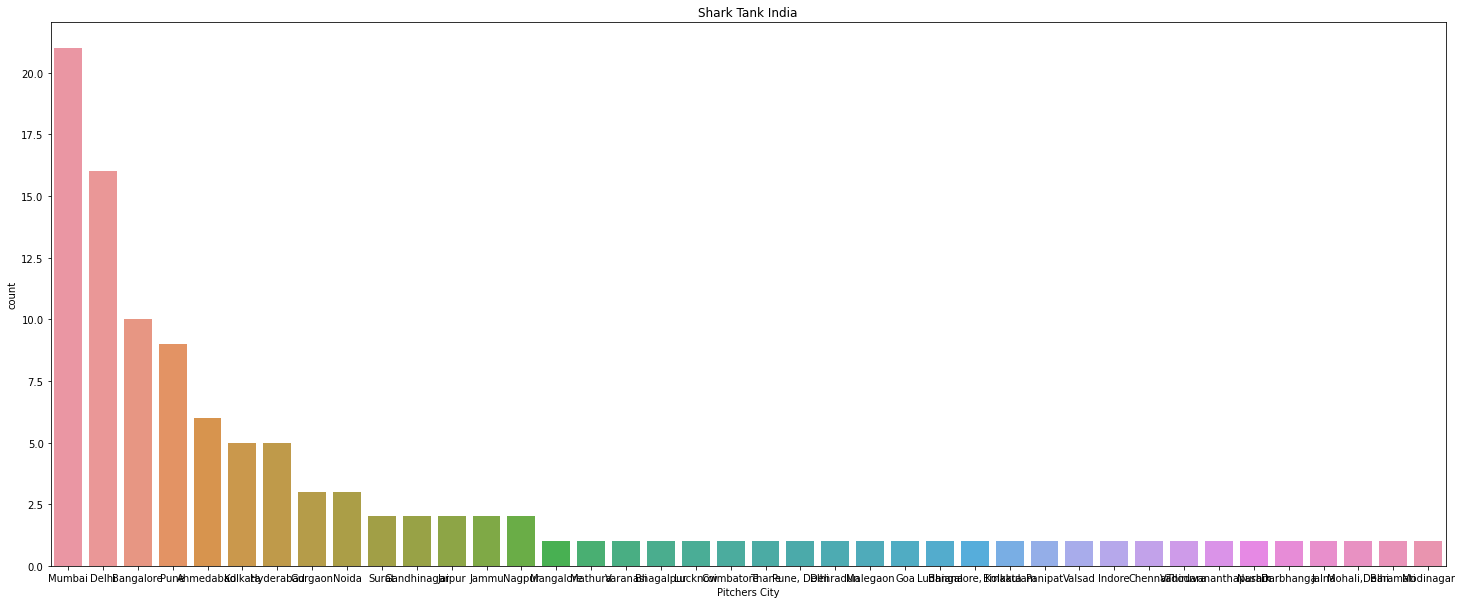

In [6]:
print(shark_tank['Pitchers City'].value_counts(), "\n")
fig = plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Pitchers City', data=shark_tank, order=shark_tank['Pitchers City'].value_counts().index)
ax.set_title('Shark Tank India')

2019.0    22
2020.0    14
2016.0    13
2021.0    12
2018.0    12
2017.0    11
2015.0     4
2014.0     3
2005.0     1
2013.0     1
2012.0     1
2022.0     1
Name: Started in, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

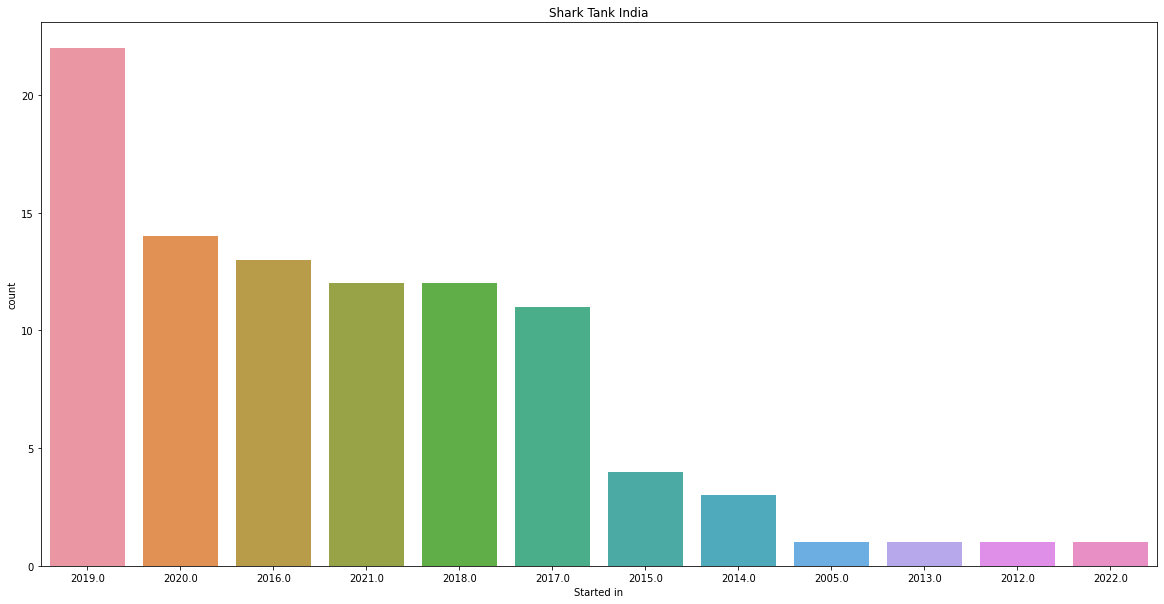

In [7]:
print(shark_tank['Started in'].value_counts(), "\n")
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Started in', data=shark_tank, order=shark_tank['Started in'].value_counts().index)
ax.set_title('Shark Tank India')

Maharashtra               37
Delhi                     16
Gujarat                   13
Karnataka                 11
Uttar Pradesh              7
Telangana                  5
West Bengal                5
Haryana                    4
Jammu & Kashmir            2
Rajasthan                  2
Tamil Nadu                 2
Kerala                     2
Bihar                      2
Punjab                     2
Madhya Pradesh             1
Karnataka, West Bengal     1
Punjab, Delhi              1
Uttarakhand                1
Goa                        1
Maharashtra, Delhi         1
Name: Pitchers State, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

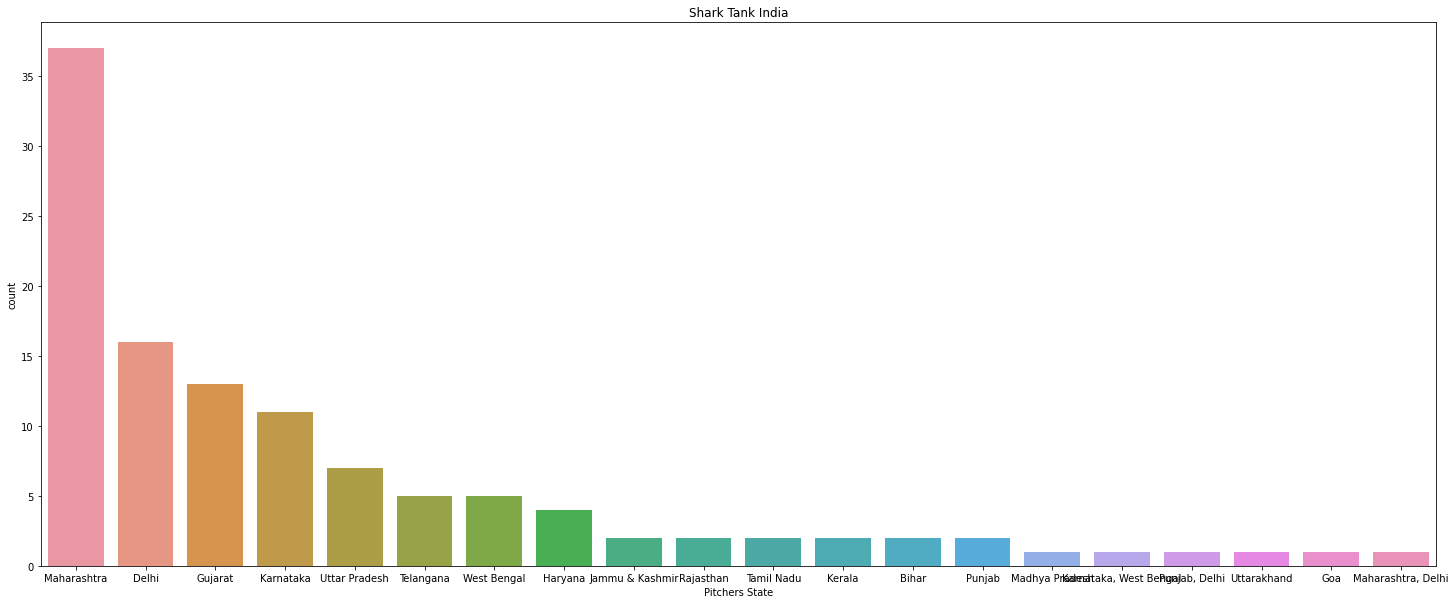

In [8]:
print(shark_tank['Pitchers State'].value_counts(), "\n")
fig = plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Pitchers State', data=shark_tank, order=shark_tank['Pitchers State'].value_counts().index)
ax.set_title('Shark Tank India')

## Distribution of different Industries that came for pitching


In [9]:
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Different Industries came in Shark Tank India </b>", color = 'Industry',template='simple_white', text=tmp)
fig.show()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64


## Gender Wise Entrepreneurs 


In [10]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')


Total pitchers - 252 

Total Male pitchers - 177 

Total female pitchers - 75 

Male entrepreneurs percentage - 70.24%

Female entrepreneurs percentage - 29.76%

Couple entrepreneurs percentage - 9.92% (data incomplete)



## Top 10 Highest Yearly Revenue of the brands

In [11]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches", text=tmpdf['Yearly Revenue'].map(int).map(str) + "%")
fig.show()

Startup Name
French Crown          7200.0
Guardian Gears        2500.0
Raising Superstars    1300.0
PlayBoxTV             1020.0
Alpino                1000.0
Hammer Lifestyle      1000.0
Shades of Spring       900.0
Tagz Foods             700.0
Devnagri               500.0
Moonshine              372.0
Name: Yearly Revenue, dtype: float64


## How many accepted or rejected sharks offers?


1    73%
0    27%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

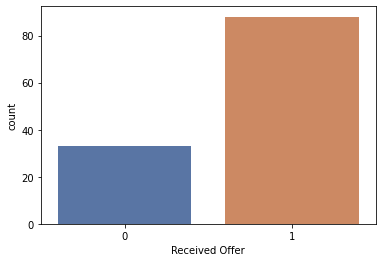

In [12]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

73% companies accepted offer while the remaining 27% could not convince the sharks to make an offer

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object 



<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

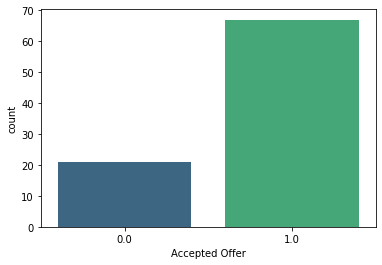

In [13]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

76% companies accepted the offer while the remaining 24% rejected sharks offer

## Startup Companies who rejected sharks offer

In [14]:
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Ask Equity","Valuation Requested","Valuation Offered"]]

,Startup Name,Original Ask Amount,Original Ask Equity,Valuation Requested,Valuation Offered
6,qZense Labs,100.0,0.25,40000,NaN
19,Torch-it,75.0,1.00,7500,NaN
20,La Kheer Deli,50.0,7.50,667,NaN
26,Kabira Handmad,100.0,5.00,2000,NaN
40,Morriko Pure Foods,100.0,3.00,3333,NaN
54,India Hemp and Co,50.0,4.00,1250,NaN
59,Keto India,150.0,1.25,12000,NaN
69,Moonshine,80.0,0.50,16000,NaN
70,Falhari,50.0,2.00,2500,NaN
72,Urban Monkey,100.0,1.00,10000,NaN


## Industry wise Investments By different sharks

Food                   8
Electrical Vehicles    3
Education              3
Manufacturing          2
Beauty/Fashion         2
Animal/Pets            1
Sports                 1
Technology             1
Name: Industry, dtype: int64


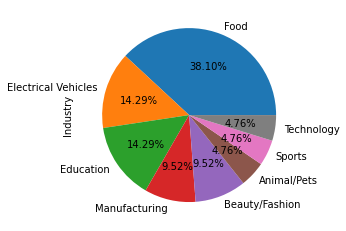

In [15]:
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Ashneer's portfolio has more food industry based startups than any other sharks.


Beauty/Fashion    7
Food              6
Education         3
Medical           3
Manufacturing     2
Animal/Pets       1
Sports            1
Services          1
Name: Industry, dtype: int64


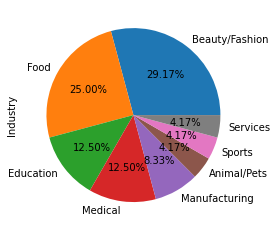

In [16]:
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Namita has more beauty and Fashion industry based startups then food based startups.

Food                   8
Beauty/Fashion         4
Electrical Vehicles    1
Medical                1
Manufacturing          1
Sports                 1
Name: Industry, dtype: int64


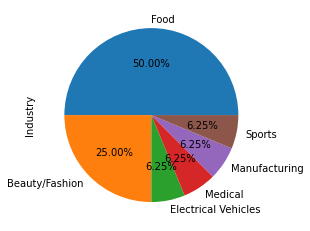

In [17]:
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Vineeta's portfolio has 50% food based industry and 25% beauty/Fashion industry. 

Manufacturing     4
Beauty/Fashion    4
Food              4
Technology        4
Medical           3
Education         3
Hardware          2
Services          2
Animal/Pets       1
Sports            1
Name: Industry, dtype: int64


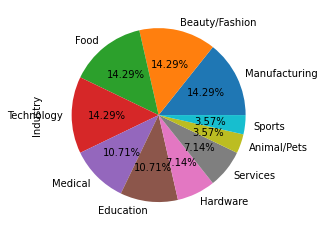

In [18]:
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Peyush has most versatile portfolio than any other sharks, showing almost equal contribution in different industries

Beauty/Fashion         6
Food                   6
Manufacturing          4
Medical                3
Electrical Vehicles    1
Technology             1
Education              1
Animal/Pets            1
Sports                 1
Name: Industry, dtype: int64


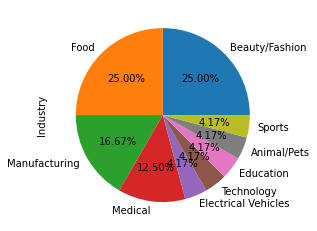

In [19]:
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Anupam's portfolio has equally distributed to food and beauty/fashion based startups.

Food                   11
Beauty/Fashion          6
Manufacturing           4
Education               2
Technology              2
Medical                 2
Electrical Vehicles     1
Animal/Pets             1
Name: Industry, dtype: int64


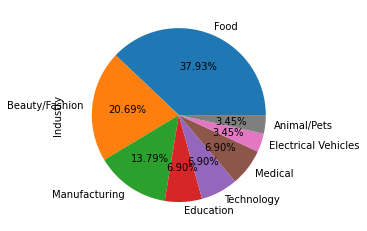

In [20]:
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Aman has more food and beauty based startups and the remaining is distributed among different industries

Food              3
Medical           2
Beauty/Fashion    1
Manufacturing     1
Name: Industry, dtype: int64


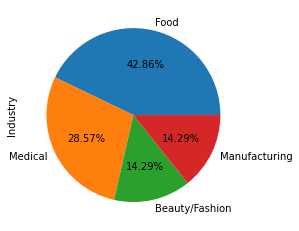

In [21]:
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Ghazal's portfolio is not so complex like the other sharks, clean and more saturated.

## Total Amount Asked by the Pitchers


1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object
The deals where more than or equals to 5 sharks are involved
             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


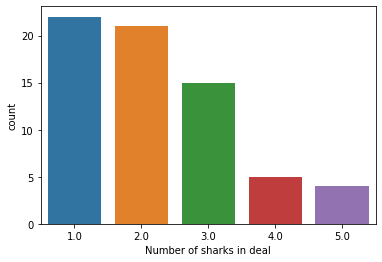

In [22]:
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
print('The deals where more than or equals to 5 sharks are involved')
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

## Total Amount Asked by the Pitchers


In [23]:
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹378.23 crores


## Total Amount Invested by the sharks


In [24]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹39.03 crores


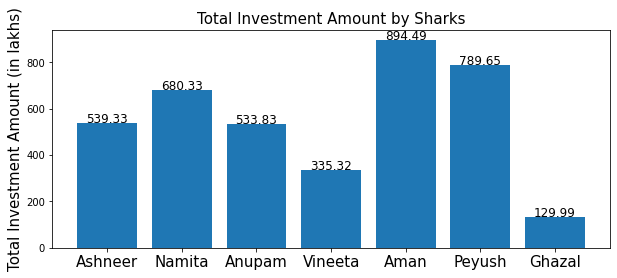

In [25]:
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

## Total Amount Lent by the Sharks

In [26]:
print(format_currency(shark_tank['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹3.51 crores


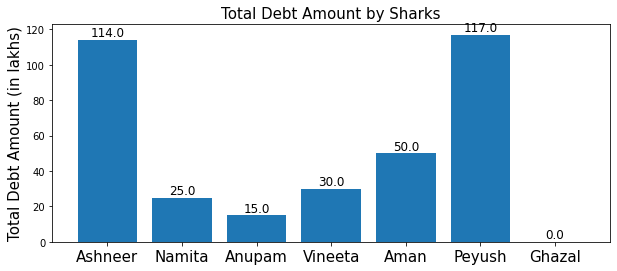

In [27]:
Amount = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Debt Amount by Sharks", fontsize=15)
plt.show()

## Portfolio's of Different sharks


In [28]:
print("Peyush Bansal's total investments", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index())

Peyush Bansal's total investments 28
Investment amount by Peyush 7.9 crores

Equity received by Peyush 317.84 % in different companies

Debt/loan amount by Peyush 1.17 crores

--------------------------------------------------------------------------------
    index           Startup Name        Industry  Peyush Investment Amount
0      22    Vivalyf Innovations         Medical                 28.000000
1      25                  Ariro   Manufacturing                 25.000000
2      27                Nuutjob  Beauty/Fashion                  8.330000
3      28               Meatyour            Food                 10.000000
4      29              EventBeep       Education                 10.000000
5      35                   LOKA      Technology                 13.330000
6      36                  Annie       Education                 35.000000
7      37             Carragreen   Manufacturing                 25.000000
8      38        The Yarn Bazaar   Manufacturing                 25.

In [29]:
print("Aman Gupta's total investments", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index())

Aman Gupta's total investments 29
Investment amount by Aman 8.94 crores

Equity received by Aman 164.25 % in different companies

Debt/loan amount by Aman 0.5 crores

--------------------------------------------------------------------------------
    index           Startup Name             Industry  Aman Investment Amount
0       0         BluePine Foods                 Food               25.000000
1       7              Peeschute       Beauty/Fashion               75.000000
2      11                 Bummer       Beauty/Fashion               37.500000
3      12            Revamp Moto  Electrical Vehicles               50.000000
4      15        Skippi Ice Pops                 Food               20.000000
5      18     Raising Superstars            Education               50.000000
6      21           Beyond Snack                 Food               25.000000
7      24                  Altor        Manufacturing               25.000000
8      25                  Ariro        Manufactur

In [30]:
print("Ghazal Alagh's total investments", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]])

Ghazal Alagh's total investments  7
Investment amount by Ghazal 1.3 crores

Equity received by Ghazal 46.7 % in different companies

Debt/loan amount by Ghazal 0.0 crores

--------------------------------------------------------------------------------
            Startup Name        Industry  Ghazal Investment Amount
75          The Sass Bar  Beauty/Fashion                 25.000000
79   Sunfox Technologies         Medical                 20.000000
85    Watt Technovations         Medical                  0.000253
88              Humpy A2            Food                 33.330000
90   Gold Safe Solutions   Manufacturing                 16.660000
91           Wakao Foods            Food                 25.000000
110   Nomad Food Project            Food                 10.000000


In [31]:
print("Ashneer Grover's total investments", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]])

Ashneer Grover's total investments 21
Investment amount by Ashneer 5.39 crores

Equity received by Ashneer 93.24 % in different companies

Debt/loan amount by Ashneer 1.14 crores

--------------------------------------------------------------------------------
              Startup Name             Industry  Ashneer Investment Amount
0           BluePine Foods                 Food                      25.00
1            Booz Scooters  Electrical Vehicles                      20.00
3               Tagz Foods                 Food                      70.00
15         Skippi Ice Pops                 Food                      20.00
18      Raising Superstars            Education                      50.00
21            Beyond Snack                 Food                      25.00
23           Motion Breeze  Electrical Vehicles                      30.00
29               EventBeep            Education                      10.00
38         The Yarn Bazaar        Manufacturing                 

In [32]:
print("Namita Thapar's Total Investments", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

Namita Thapar's Total Investments 24
Investment amount by Namita 6.8 crores

Equity received by Namita 140.78 % in different companies

Debt/loan amount by Namita 0.25 crores

--------------------------------------------------------------------------------
              Startup Name        Industry  Namita Investment Amount
11                  Bummer  Beauty/Fashion                 37.500000
15         Skippi Ice Pops            Food                 20.000000
16            Menstrupedia       Education                 50.000000
24                   Altor   Manufacturing                 25.000000
27                 Nuutjob  Beauty/Fashion                  8.330000
32                   Farda  Beauty/Fashion                 15.000000
33                    Auli  Beauty/Fashion                 75.000000
36                   Annie       Education                 35.000000
39       The Renal Project         Medical                 50.000000
44                 Cocofit            Food           

In [33]:
print("Anupam Mittal's total investments", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

Anupam Mittal's total investments 24
Investment amount by Anupam 5.34 crores

Equity received by Anupam 166.35 % in different companies

Debt/loan amount by Anupam 0.15 crores

--------------------------------------------------------------------------------
                 Startup Name             Industry  Anupam Investment Amount
2         Heart up my Sleeves       Beauty/Fashion                 12.500000
9                      Cos IQ       Beauty/Fashion                 25.000000
12                Revamp Moto  Electrical Vehicles                 50.000000
15            Skippi Ice Pops                 Food                 20.000000
22        Vivalyf Innovations              Medical                 28.000000
28                   Meatyour                 Food                 10.000000
31   ARRCOAT Surface Textures        Manufacturing                 50.000000
35                       LOKA           Technology                 13.330000
36                      Annie            Educatio

In [34]:
print("Vineeta Singh's total investments", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

Vineeta Singh's total investments 16
Investment amount by Vineeta 3.35 crores

Equity received by Vineeta 135.53 % in different companies

Debt/loan amount by Vineeta 0.3 crores

--------------------------------------------------------------------------------
            Startup Name             Industry  Vineeta Investment Amount
0         BluePine Foods                 Food                      25.00
1          Booz Scooters  Electrical Vehicles                      20.00
2    Heart up my Sleeves       Beauty/Fashion                      12.50
8                   NOCD                 Food                      20.00
9                 Cos IQ       Beauty/Fashion                      25.00
15       Skippi Ice Pops                 Food                      20.00
64            Get-A-Whey                 Food                      33.33
66      The Quirky Naari       Beauty/Fashion                      17.50
79   Sunfox Technologies              Medical                      20.00
88        

## Top investments as per Loan Amount

In [35]:
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show()

Startup Name
Otua               99.0
Namhya Foods       50.0
Store My Goods     50.0
Bamboo India       30.0
NOCD               30.0
PNT                25.0
The State Plate    25.0
Sid07 Designs      22.0
KG Agrotech        20.0
Name: Total Deal Debt, dtype: float64


## Total Equity Received By Sharks

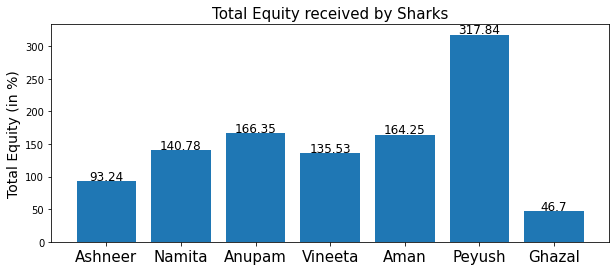

In [36]:
Equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

## Companies who got the same valuation as they requested

In [37]:
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

,Startup Name,Valuation Requested,Valuation Offered
21,Beyond Snack,2000,2000.0
44,Cocofit,0,0.0
85,Watt Technovations,0,0.0


## Some companies were on pre-revenue or didn't had any revenue (as of pitching day)

In [38]:
df2 = shark_tank.loc[shark_tank['Yearly Revenue'] == 0]
print(df2['Startup Name'])

23        Motion Breeze
41      Good Good Piggy
82     Julaa Automation
97             Scholify
99           Sabjikothi
113             On2Cook
Name: Startup Name, dtype: object
